# [05．Analyze weather data.]

### 1. Get the weather forecast for the last 10 years.

* Download past weather data. 
  * url: http://www.data.jma.go.jp/gmd/risk/obsdl/index.php
  * Tokyo, Daily value, 2006/1/1-2016/12/31
  * Remove extra header items after downloading.

### 2. Modify and save the machine learning CSV file.

In [3]:
inFile = "data.csv"
outFile = "kion10y.csv"

#!
#! Read the CSV file one line at a time.
#!
with open(inFile, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()

#!    
#! Remove the header and add a new one.
#!
lines = [" 年, 月, 日, 気温, 品質, 均質\n"] + lines[5:]
lines = map(lambda v: v.replace("/", ","), lines)
result = "".join(lines).strip()
print(result)

#!    
#! Output the result to a file.
#!
with open(outFile, "wt", encoding="utf-8(") as writer:
    writer.write(result)
print("saved.")


年, 月, 日, 気温, 品質, 均質
2006,1,5,3.6,8,1
2006,1,6,2.1,8,1
2006,1,7,2.8,8,1
2006,1,8,4.2,8,1
2006,1,9,3.7,8,1
2006,1,10,4.3,8,1
2006,1,11,6.1,8,1
2006,1,12,6.1,8,1
2006,1,13,4.0,8,1
2006,1,14,6.6,8,1
2006,1,15,10.7,8,1
2006,1,16,9.0,8,1
2006,1,17,8.0,8,1
2006,1,18,5.6,8,1
2006,1,19,4.2,8,1
2006,1,20,4.0,8,1
2006,1,21,1.3,8,1
2006,1,22,3.1,8,1
2006,1,23,2.5,8,1
2006,1,24,4.4,8,1
2006,1,25,5.5,8,1
2006,1,26,6.0,8,1
2006,1,27,6.8,8,1
2006,1,28,5.5,8,1
2006,1,29,6.0,8,1
2006,1,30,8.4,8,1
2006,1,31,7.1,8,1
2006,2,1,5.7,8,1
2006,2,2,7.8,8,1
2006,2,3,6.0,8,1
2006,2,4,1.6,8,1
2006,2,5,1.9,8,1
2006,2,6,2.0,8,1
2006,2,7,3.6,8,1
2006,2,8,7.9,8,1
2006,2,9,4.6,8,1
2006,2,10,5.6,8,1
2006,2,11,7.5,8,1
2006,2,12,4.6,8,1
2006,2,13,5.7,8,1
2006,2,14,10.5,8,1
2006,2,15,14.1,8,1
2006,2,16,7.5,8,1
2006,2,17,7.0,8,1
2006,2,18,4.4,8,1
2006,2,19,7.0,8,1
2006,2,20,6.4,8,1
2006,2,21,8.0,8,1
2006,2,22,10.8,8,1
2006,2,23,11.2,8,1
2006,2,24,6.5,8,1
2006,2,25,7.8,8,1
2006,2,26,7.5,8,1
2006,2,27,8.6,8,1
2006,2,28,4.6,8,1

### 3. When acquiring temperature data in Colaboratory(Here on Github).

In [8]:
#! Download.
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/kujirahand/mlearn-sample/master/tenki2006-2016/kion10y.csv","kion10y.csv")
#! Display
import pandas as pd
pd.read_csv("kion10y.csv")


,年,月,日,気温,品質,均質
0,2006,1,1,3.6,8,1
1,2006,1,2,4.0,8,1
2,2006,1,3,3.7,8,1
3,2006,1,4,4.0,8,1
4,2006,1,5,3.6,8,1
...,...,...,...,...,...,...
4013,2016,12,27,11.1,8,2
4014,2016,12,28,6.0,8,2
4015,2016,12,29,4.3,8,2
4016,2016,12,30,6.0,8,2


### 4. Check the average temperature.

In [11]:
import pandas as pd

#!
#! Read CSV with Pandas.
#!
df = pd.read_csv("kion10y.csv", encoding="UTF-8")

#!
#! List temperature by date.
#!
md = {}
for i, row in df.iterrows():
    m, d, v = (int(row["月"]), int(row["日"]), float(row["気温"]))
    key = str(m) + "/" + str(d)
    if not (key in md):
        # Create if there is no KEY.
        md[key] = []
    # Add values to the same date array.
    md[key] += [v] 

#!
#! Average for each date.
#!
averages = {}
for key in md:
    v = averages[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, v))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

- Displays the average temperature for a given date.

In [12]:
averages["7/22"]

25.354545454545452

### 5. Check the monthly average temperature.

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


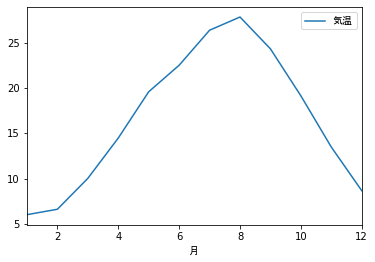

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
#!
#! Read CSV with Pandas.
#!
df = pd.read_csv("kion10y.csv", encoding="UTF-8")

#!
#! Calculate the average temperature for each month.
#!
groups = df.groupby(["月"])["気温"]
groupAverages = groups.sum() / groups.count()

#!
#! Display the result..
#!
print(groupAverages)
groupAverages.plot()
plt.xlabel("月", fontname="MS Gothic") #! Avoid garbled characters..
plt.legend(["気温"], prop={"family":"MS Gothic"}) #! Avoid runtime error.
plt.savefig("tenki-heikin-tuki.png")
plt.show()


### 6.Calculate the number of days when the temperature exceeds 30 degrees.

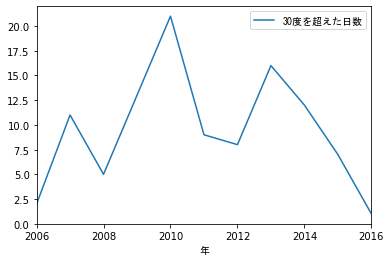

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
#!
#! Read CSV with Pandas.
#!
df = pd.read_csv("kion10y.csv", encoding="UTF-8")

#!
#! Examine data where the temperature exceeds 30 degrees.
#!
over30checks = (df["気温"] > 30)
# print(over30checks)

#!
#! Extract data.
#!
over30List = df[over30checks]
#print(over30List)
countArray = over30List.groupby(["年"])["年"].count()

#!
#! Output.
#!
#print(countArray)
countArray.plot()
plt.xlabel("年", fontname="MS Gothic") #! Avoid garbled characters..
plt.legend(["30度を超えた日数"], prop={"family":"MS Gothic"}) #! Avoid runtime error.
plt.savefig("tenki-over30.png")
plt.show()

## ※ Predict tomorrow's temperature by regression analysis.

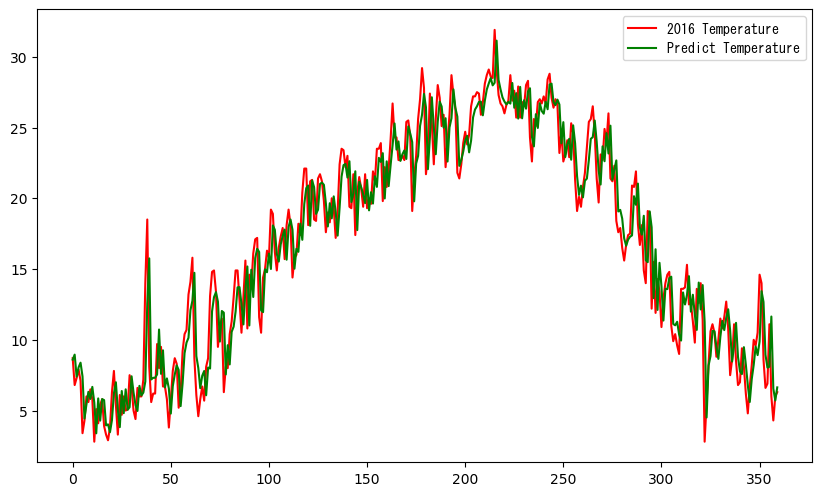

In [71]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#!
#! Read CSV with Pandas.
#!
df = pd.read_csv("kion10y.csv", encoding="UTF-8")

#!
#! Divide into learning and testing.
#!
# Learning data up to 2015.
trainYear = (df["年"] <= 2015)
# 2016 data for testing.
testYear = (df["年"] >= 2016)
interval = 6

#!
#! Create data to learn the past 6 days.
#!
def make_data(data):
    x = [] # learn data.
    y = [] # result.
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i < interval:
            continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)

train_x, train_y = make_data(df[trainYear])
test_x, test_y = make_data(df[testYear])

#!
#! Perform linear regression analysis.
#!
clf = LinearRegression(normalize=True)
clf.fit(train_x, train_y) # Machine learning.
predict_y = clf.predict(test_x) # Machine predict.

#!
#! The result is plotted in the figure.
#!
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c="r")
plt.plot(predict_y, c="g")
plt.legend(["2016 Temperature", "Predict Temperature"], prop={"family":"MS Gothic"}) #! Avoid runtime error.
plt.savefig("tenki-kion-predict.png")
plt.show()
#print(len(predict_y))

### ・Evaluation of execution data.

In [73]:
diff_y = abs(predict_y - test_y)
# Average temperature error.
print("<<average>>", sum(diff_y) / len(diff_y))
# Maximum error.
print("<<max    >>", max(diff_y))

print(diff_y)

<<average>> 1.6640684971954254
<<max    >> 8.471949619908475
[0.10002007 2.15225572 0.10256015 0.15142234 1.28187488 4.01365434
 0.13671099 0.56975101 0.72603441 0.68140458 0.87244611 2.7607466
 1.70903185 1.75737089 1.11231561 0.01187698 1.83773828 0.65039859
 1.12591734 0.32619115 1.97861532 1.57885621 1.59928286 1.72686513
 2.27163088 1.68023609 1.18539052 1.50001243 0.05121848 2.25973761
 0.72214703 1.27944462 0.98314343 1.63017942 0.74598537 0.06470342
 0.92896962 6.94975005 5.93966138 7.65213866 1.595504   1.11502761
 1.11392207 2.14812766 2.7258388  1.9074255  2.55773688 0.06004565
 1.47215308 2.75437918 1.01277685 1.07156242 1.15714278 0.1103171
 2.66758147 0.98676704 2.27801803 1.34517563 0.89701271 3.05874001
 2.0044005  3.03635208 6.03314611 2.75256234 3.40484054 0.78378786
 0.7571854  2.09606982 2.02017163 0.6575501  5.12999152 2.79552762
 1.885336   0.03289231 3.19409118 1.127126   0.53537591 5.61959708
 0.54903535 1.61963203 2.1418707  0.73748246 2.0733521  2.9145948
 1.1